In [1]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, ComplementNB, MultinomialNB, CategoricalNB, BernoulliNB
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def getData(num_samples):
    save_folder = 'train_0.5_valid_0.7_test'
    train_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_NaNmean.csv')
    X_train = train_data.drop(['Species'], axis = 1).values
    y_train = train_data[['Species']].copy().values
    valid_data = pd.read_csv('../data/' + save_folder + '/valid_data_NaNmean.csv')
    X_valid = valid_data.drop(['Species'], axis = 1).values
    y_valid = valid_data[['Species']].copy().values

#     y_train = np.squeeze(y_train)
#     n_values = np.max(y_train) + 1
#     y_train = np.eye(n_values)[y_train]

#     y_valid = np.squeeze(y_valid)
#     n_values = np.max(y_valid) + 1
#     y_valid = np.eye(n_values)[y_valid]
    return X_train, y_train, X_valid, y_valid

def getDataNormalization(num_samples):
    save_folder = 'train_0.5_valid_0.7_test'
    train_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_Normalization.csv')
    #X_train = train_data.drop(['Species', 'Culmen Length (mm)'], axis = 1).values
    X_train = train_data.drop(['Species'], axis = 1).values
    y_train = train_data[['Species']].copy().values
    valid_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_valid.csv')
    #X_valid = valid_data.drop(['Species', 'Culmen Length (mm)'], axis = 1).values
    X_valid = valid_data.drop(['Species'], axis = 1).values
    y_valid = valid_data[['Species']].copy().values
    
    # label should be int
    y_train = np.floor(y_train + 1.1).astype(int)
#     y_train = np.squeeze(y_train)
#     n_values = np.max(y_train) + 1
#     y_train = np.eye(n_values)[y_train]
    
    # label should be int
    y_valid = np.floor(y_valid + 1.1).astype(int)
#     y_valid = np.squeeze(y_valid)
#     n_values = np.max(y_valid) + 1
#     y_valid = np.eye(n_values)[y_valid]
    return X_train, y_train, X_valid, y_valid

def getTestDataset(num_samples):
    save_folder = 'train_0.5_valid_0.7_test'
    test_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_test.csv')
    #X_valid = valid_data.drop(['Species', 'Culmen Length (mm)'], axis = 1).values
    X_test = test_data.drop(['Species'], axis = 1).values
    y_test = test_data[['Species']].copy().values
    
#     y_test = np.floor(y_test + 1.1).astype(int)
#     y_test = np.squeeze(y_test)
#     n_values = np.max(y_test) + 1
#     y_test = np.eye(n_values)[y_test]
    return X_test, y_test

In [4]:
gaussian = []
test_size = [50, 110, 170]

for length in test_size:
    X_train, y_train, X_valid, y_valid = getData(length)   
    X_train = X_train
    X_valid = X_valid
    
    GaussianNB
    model = GaussianNB()
    model.fit(X_train, y_train)
    # GaussianNB(priors=None)
    # predict our sample
    y_pred = model.predict(X_valid)
    # evaluation our prediction
    print("gauss", length) 
    print(metrics.accuracy_score(y_valid, y_pred))
    gaussian.append(metrics.accuracy_score(y_valid, y_pred))


gauss 50
0.9852941176470589
gauss 110
1.0
gauss 170
1.0


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
gaussian_validation = []
test_size = [50, 110, 170]

for length in test_size:
    X_train, y_train, X_valid, y_valid = getDataNormalization(length)   
    X_train = X_train
    X_valid = X_valid
    
    GaussianNB
    model = GaussianNB()
    model.fit(X_train, y_train)
    # GaussianNB(priors=None)
    # predict our sample
    y_pred = model.predict(X_valid)
    # evaluation our prediction
    print("gauss", length) 
    print(metrics.accuracy_score(y_valid, y_pred))
    gaussian_validation.append(metrics.accuracy_score(y_valid, y_pred))


gauss 50
0.9852941176470589
gauss 110
1.0
gauss 170
1.0


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3


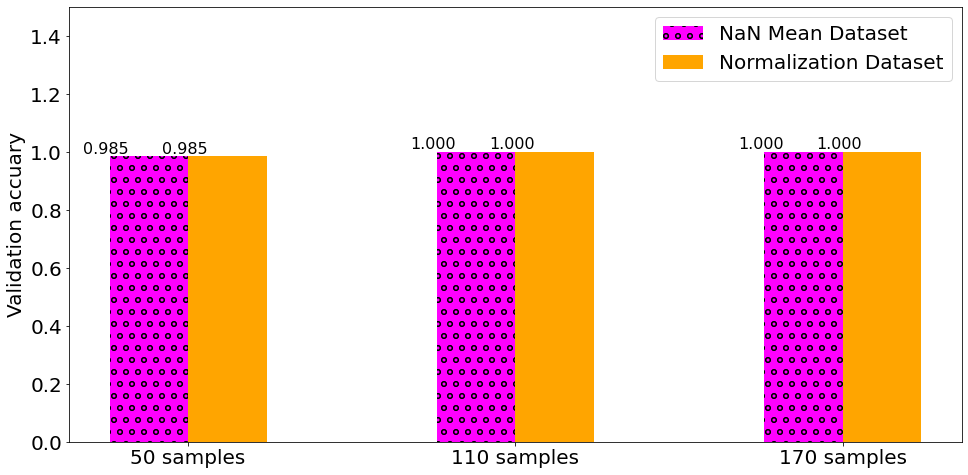

In [15]:
objects = ('50 samples', '110 samples', '170 samples')
print(len(objects))
y_pos = np.arange(len(objects))
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = '20'

for index, value in enumerate(gaussian):
    plt.text(index - 0.32, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(gaussian_validation):
    plt.text(index - 0.08, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
#plt.bar(y_pos, performance, align='center', alpha=0.5)
bars_sigmoid = plt.bar(y_pos - 0.12, gaussian, 0.24, label = 'NaN Mean Dataset', color = 'magenta')
plt.bar(y_pos + 0.12, gaussian_validation, 0.24, label = 'Normalization Dataset', color = 'orange')
# bars_linear = plt.bar(y_pos + 0.24, knn50, 0.24, label = 'Weight 3', color = 'teal')
#plt.bar(y_pos + 0.36, min_rewardVSs, 0.24, label = 'Lowest tolerance latency in a time slot compared to 5 VS')
plt.xticks(y_pos, objects)
plt.ylim([0, 1.5])
plt.ylabel("Validation accuary")
patterns = ("o", "o", "o")
for i, x in zip(bars_sigmoid,patterns):
      i.set_hatch(x)
patterns = ("\\", "\\", "\\")
# for i, x in zip(bars_linear,patterns):
#       i.set_hatch(x)
plt.legend(fontsize = 20)
#plt.margins(0.1,0)
plt.savefig('../pics/NB/NB.svg', bbox_inches='tight')
plt.savefig('../pics/NB/NB.pdf', bbox_inches='tight')
plt.show()